In [ ]:
import tensorflow as tf

train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "D:\Projects\ML\data\data3", # путь к изображениям
    validation_split=0.2, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(200,400), # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    batch_size=32, # размер пакета (батча)
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


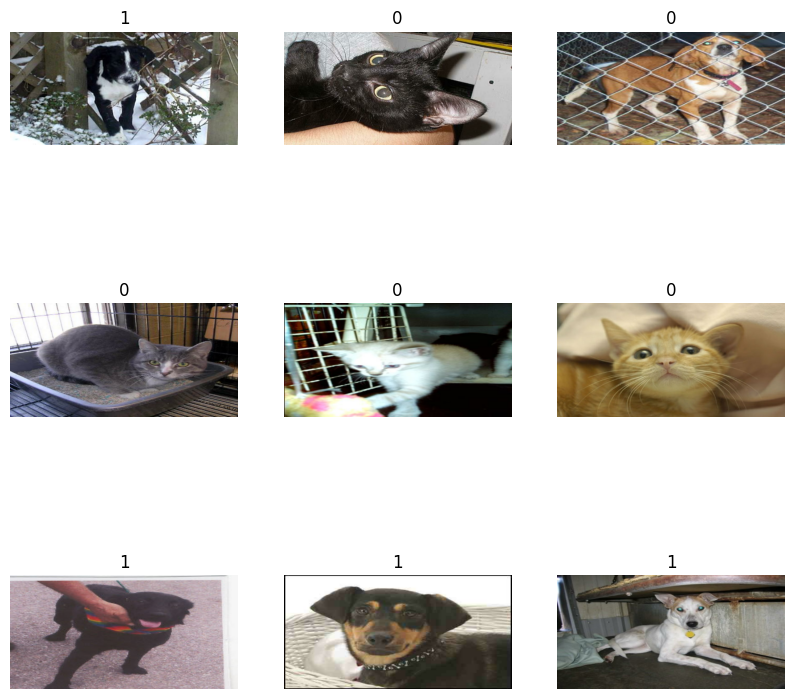

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

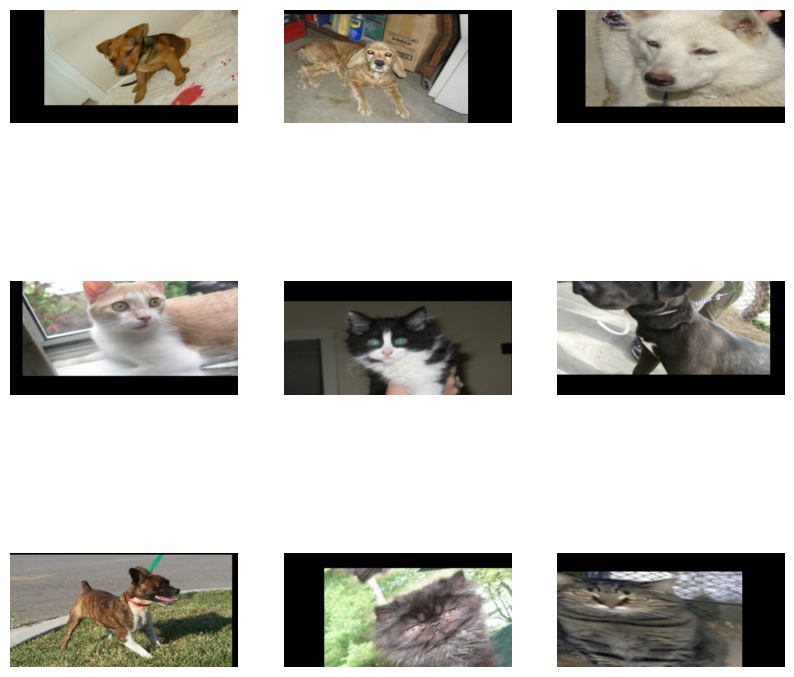

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="constant")
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# входной слой - размер (200, 400, 3)
inputs = tf.keras.Input(shape=(200, 400, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# первый сверточный слой
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
# первый пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 200, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 100, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 50, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 25, 128)      0         
 2D)                                                         

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
50/50 [==============================] - 33s 644ms/step - loss: 0.9945 - accuracy: 0.5181 - val_loss: 0.6972 - val_accuracy: 0.4550
Epoch 2/5
50/50 [==============================] - 34s 680ms/step - loss: 0.6935 - accuracy: 0.5113 - val_loss: 0.6936 - val_accuracy: 0.4550
Epoch 3/5
50/50 [==============================] - 48s 941ms/step - loss: 0.6931 - accuracy: 0.5113 - val_loss: 0.6939 - val_accuracy: 0.4550
Epoch 4/5
50/50 [==============================] - 42s 817ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6943 - val_accuracy: 0.4550
Epoch 5/5
50/50 [==============================] - 34s 669ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6945 - val_accuracy: 0.4550


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    r"D:\Projects\ML\data\data3\dogs\2.jpg", target_size=(200, 400)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 165ms/step


array([[0.5067845, 0.4932155]], dtype=float32)

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\Projects\ML\data\caltech-101\101_ObjectCategories\MY", # путь к изображениям
    validation_split=0.15, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(224,224), # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    batch_size=32, # размер пакета (батча)
)

Found 147 files belonging to 3 classes.
Using 125 files for training.
Using 22 files for validation.


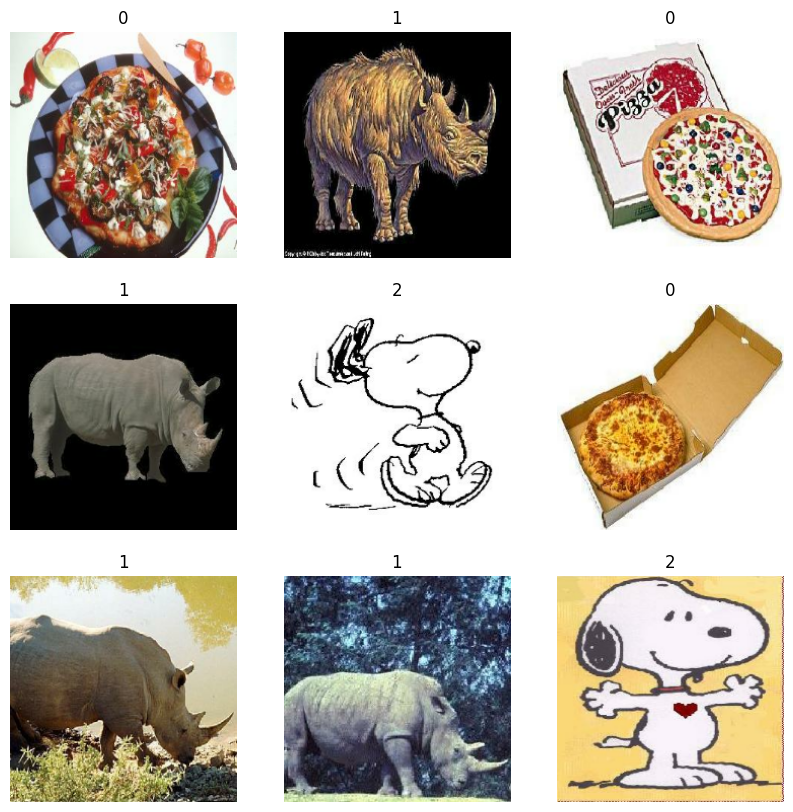

In [ ]:
plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [ ]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
inp = vgg.input

# создадим новый слой классификации по нашему количеству классов
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

# соединим предпоследний слой VGG и наш новый слой классификации
out = new_classification_layer(vgg.layers[-2].output)

# создадим новую модель
model_new = tf.keras.Model(inp, out)

In [ ]:
# посмотрим, что изменилось
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# "заморозим" все слои, кроме последнего
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
4/4 [==============================] - 20s 5s/step - loss: 0.7296 - accuracy: 0.7920 - val_loss: 0.0550 - val_accuracy: 0.9545
Epoch 2/5
4/4 [==============================] - 18s 5s/step - loss: 0.0677 - accuracy: 0.9920 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 19s 5s/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 18s 5s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 8.0148e-04 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 20s 5s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.1461e-04 - val_accuracy: 1.0000


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    r"D:\Projects\ML\data\caltech-101\101_ObjectCategories\MY\rhino\image_0010.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 0s 338ms/step


array([[1.3690479e-10, 9.9999940e-01, 5.9883826e-07]], dtype=float32)

In [ ]:
# "заморозим" все слои, кроме второй сконца
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-2].trainable = True

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
4/4 [==============================] - 23s 6s/step - loss: 7.4531 - accuracy: 0.7440 - val_loss: 2.9260e-07 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 20s 5s/step - loss: 0.0066 - accuracy: 0.9920 - val_loss: 0.6798 - val_accuracy: 0.9545
Epoch 3/5
4/4 [==============================] - 19s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3880 - val_accuracy: 0.9545
Epoch 4/5
4/4 [==============================] - 21s 5s/step - loss: 0.0098 - accuracy: 0.9920 - val_loss: 1.4279 - val_accuracy: 0.9545
Epoch 5/5
4/4 [==============================] - 20s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.4372 - val_accuracy: 0.9545


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    r"D:\Projects\ML\data\caltech-101\101_ObjectCategories\MY\rhino\image_0010.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 0s 357ms/step


array([[0., 1., 0.]], dtype=float32)